
# Classification Project: Predicting Data Scientist Job Change 

### By Raghad Althunayyan & Shatha Almoteb 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>    
<li><a href="#model">Modeling</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> A company who provided Data Science training is in need of Data Scientist for their own company. However, they faced difficulties in hiring process. After processing some Candidates, Candidates tend to bail out in end of recruitment process. This situation made HR team to start over again to find the suitable candidate.

>As the end of the year, HR department decided to make new enhancement in the process of recruitment from candidates who sign up their training. The ais for this enhancement is Company will easily known which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

>The datasets that will be used in this project is a public source from Kaggle.

In [1]:
# import statements for all of the packages that I plan to use.
import pandas as pd 
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. I will document my steps carefully and justify cleaning decisions.

<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assesment">Data Assesment</a></li>
<li><a href="#Assesment Report">Assesment Report</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>

<a id='Gathering'></a>
### Data Gathering

In [2]:
df= pd.read_csv("aug_train.csv",  error_bad_lines=False)
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<a id='Assesment'></a>
### Data Assesment
- Perform operations to inspect data types
- Look for instances of missing or possibly errant data.

In [3]:
df2 = df.copy()

In [4]:
# inspect dataset shape.
df2.shape

(19158, 14)

In [5]:
# inspect data type for each column.
df2.dtypes


enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [6]:
# inspect data set for missing values
df2.isna().sum() 

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Data Cleaning & EDA

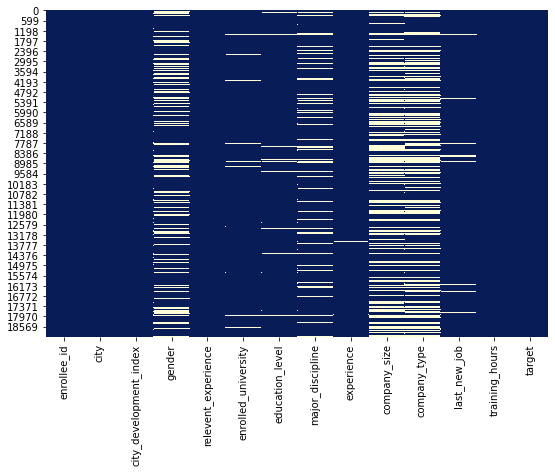

In [7]:
#Visulaization of missing values
fig, ax = plt.subplots(figsize=(9,6))
sn.heatmap(df2.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

<a id='Assesment Report'></a>
### Final Assesment Report

- Columns 'position_id'and 'city' has no valuable data(less important).

- Column experience and last_new_job are object type and has errant data.

- Converting some columns to float/integer by cleaning them.

- Most of columns have nan values.

<a id='eda'></a>
## Exploratory Data Analysis

>  Now we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing.


<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

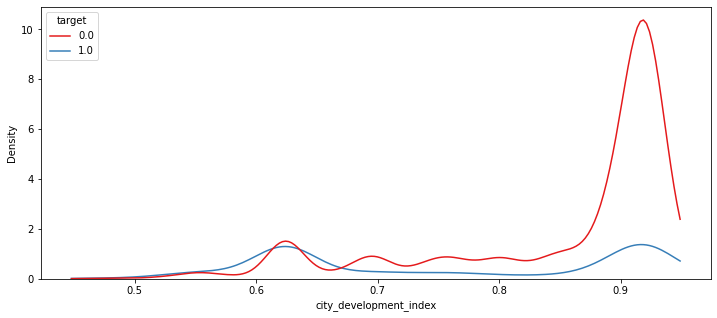

In [8]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df2, x="city_development_index", hue="target",cut = 0,palette='Set1')

<AxesSubplot:xlabel='gender', ylabel='count'>

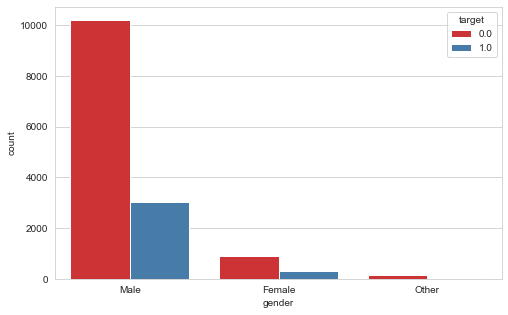

In [9]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'gender',hue='target',data=df2,palette='Set1')

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

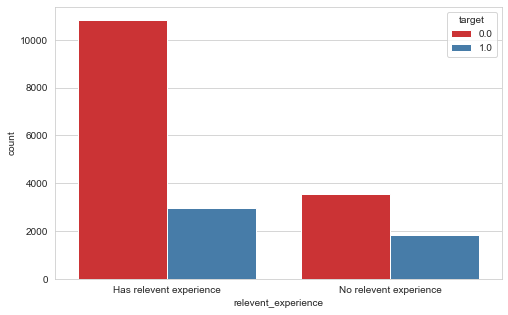

In [10]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'relevent_experience',hue='target',data=df2,palette='Set1')

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

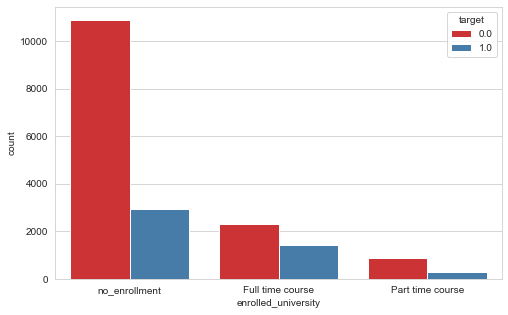

In [11]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'enrolled_university',hue='target',data=df2,palette='Set1')

<AxesSubplot:xlabel='education_level', ylabel='count'>

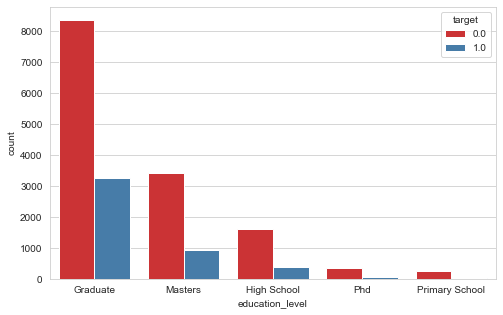

In [12]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'education_level',hue='target',data=df2,palette='Set1')

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

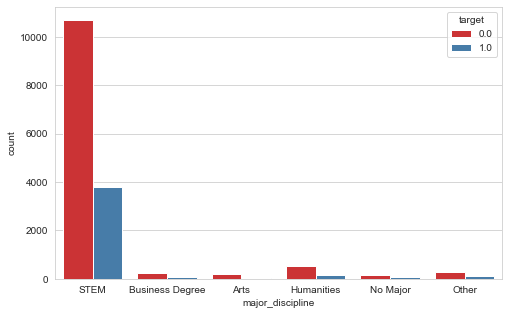

In [13]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df2,palette='Set1')


<AxesSubplot:xlabel='training_hours', ylabel='Density'>

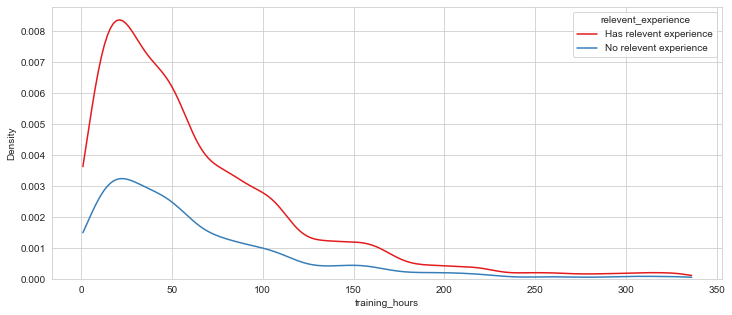

In [14]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df2, x="training_hours", hue="relevent_experience",cut = 0,palette='Set1')

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

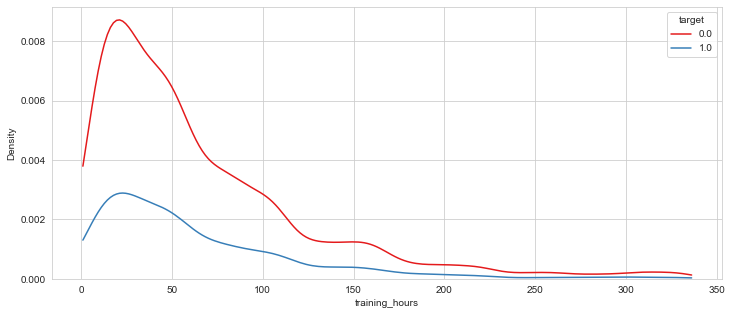

In [15]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df2, x="training_hours", hue="target",cut = 0,palette='Set1')

<a id="Cleaning"></a>
## Data Cleaning

<ul>
<li>Check null.</li>
<li>Deal with outlire.</li>
<li>Remove Unnecessary columns.</li>
<li>Drop duplicates.</li>
</ul>

In [16]:
df2.target.value_counts()/len(df2)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

In [17]:
df2['enrollee_id'].head()

0     8949
1    29725
2    11561
3    33241
4      666
Name: enrollee_id, dtype: int64

### Drob column

In [18]:
#drop column
df2.drop(['enrollee_id' ,'city'] , axis=1, errors="ignore" , inplace = True)

### Checking duplicates 

In [19]:
## Checking duplicates rows 
len(df2)-len(df2.drop_duplicates())

60

In [20]:
#Checking duplicates rows and drop.
df2.drop_duplicates(keep="first", inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19098 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19098 non-null  float64
 1   gender                  14590 non-null  object 
 2   relevent_experience     19098 non-null  object 
 3   enrolled_university     18712 non-null  object 
 4   education_level         18638 non-null  object 
 5   major_discipline        16289 non-null  object 
 6   experience              19033 non-null  object 
 7   company_size            13184 non-null  object 
 8   company_type            12982 non-null  object 
 9   last_new_job            18675 non-null  object 
 10  training_hours          19098 non-null  int64  
 11  target                  19098 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.9+ MB


### Gender Column

In [21]:
df2.gender.value_counts()

Male      13162
Female     1237
Other       191
Name: gender, dtype: int64

In [22]:
df2['gender'].isnull().sum()

4508

In [23]:
df2['gender'] = df2['gender'].fillna('Male')
df2['gender'].isnull().sum()

0

### relevent xperience Column

In [24]:
df2['relevent_experience'].value_counts()


Has relevent experience    13739
No relevent experience      5359
Name: relevent_experience, dtype: int64

In [25]:
df2['relevent_experience'].isnull().sum()

0

### enrolled university Column

In [26]:
df2['enrolled_university'].value_counts()

no_enrollment       13762
Full time course     3752
Part time course     1198
Name: enrolled_university, dtype: int64

In [27]:
df2['enrolled_university'] = df2['enrolled_university'].fillna('no_enrollment')

### education level Column

In [28]:
df2['education_level'].value_counts()

Graduate          11545
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [29]:
df2['education_level'].isnull().sum()

460

In [30]:
df2['education_level'] = df2['education_level'].fillna('Graduate')

### major discipline Column

In [31]:
df2['major_discipline'].value_counts()

STEM               14436
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [32]:
df2['major_discipline'].isnull().sum()

2809

In [33]:
df2['major_discipline'] = df2['major_discipline'].fillna('STEM')

### experience Column

In [34]:
df2['experience'].value_counts()


>20    3245
5      1427
4      1401
3      1353
6      1214
2      1124
7      1027
10      985
9       978
8       802
15      683
11      664
14      586
1       549
<1      521
16      507
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [35]:
df2['experience'].mode()

0    >20
dtype: object

In [36]:
df2['experience'] = df2['experience'].fillna('>20')
 

### company size Column

In [37]:
df2['company_size'].value_counts()

50-99        3077
100-500      2559
10000+       2009
10/49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: company_size, dtype: int64

In [38]:
df2['company_size'].isnull().sum()

5914

In [39]:
df2['company_size'].mode()

0    50-99
dtype: object

In [40]:
df2['company_size'] = df2['company_size'].fillna('50-99')

### company type Column

In [41]:
df2['company_type'].value_counts()

Pvt Ltd                9785
Funded Startup          999
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [42]:
df2['company_type'].isnull().sum()

6116

In [43]:
df2['company_type'].mode()

0    Pvt Ltd
dtype: object

In [44]:
df2['company_type'] = df2['company_type'].fillna('Pvt Ltd')


### last_new_job Column

In [45]:
df2['last_new_job'].value_counts()

1        8021
>4       3263
2        2893
never    2447
4        1029
3        1022
Name: last_new_job, dtype: int64

In [46]:
df2['last_new_job'].isnull().sum()

423

In [47]:
df2['last_new_job'].mode()

0    1
dtype: object

In [48]:
df2['last_new_job'] = df2['last_new_job'].fillna('1')

### target Column

,Count
target,
0,14337
1,4761


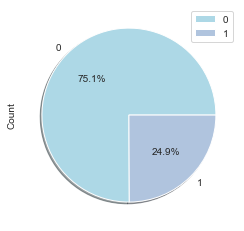

In [49]:
df2["target"] = df2["target"].astype("int")
my_colors = ['lightblue','lightsteelblue','silver']
target = pd.DataFrame(df2[['target']].value_counts())
target = target.reset_index().set_index('target')
target.columns = ['Count']
_ = target.plot.pie(y='Count',shadow = True, colors=my_colors , autopct='%1.1f%%')
target

In [50]:

df2["gender"] = df2["gender"].astype("str")
df2["experience"] = df2["experience"].astype("str")
df2["relevent_experience"] = df2["relevent_experience"].astype("str")
df2["enrolled_university"] = df2["enrolled_university"].astype("str")
df2["education_level"] = df2["education_level"].astype("str")
df2["major_discipline"] = df2["major_discipline"].astype("str")

df2["experience"] = df2["experience"].str.replace("<" ,"")
df2["experience"] = df2["experience"].str.replace(">", "")
df2["experience"] = df2["experience"].astype("int")


df2["last_new_job"] = df2["last_new_job"].str.replace("<" ,"")
df2["last_new_job"] = df2["last_new_job"].str.replace(">", "")
df2["last_new_job"] = df2["last_new_job"].str.replace("never", "0")
df2["last_new_job"] = df2["last_new_job"].astype("int")



## Beasline for numeric variables (before feature eng)

In [51]:
y = df2['target']
X = df2[['city_development_index','training_hours']]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [53]:
#baseline model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
#y_pred  = lr_model.predict(X_test)
accuracy_train_set = lr_model.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_set = lr_model.score(X_val, y_val)  #get accuracy on valid set
#accuracy_test_set = lr_model.score(X_test, y_test)  #get accuracy on test set
print('Logistic Regression Model, Accuracy (Train Set) :' , accuracy_train_set)
print('Logistic Regression Model, Accuracy (Val Set) : ', accuracy_valid_set)
#print(“Logistic Regression Model, Accuracy (test Set) : “, accuracy_test_set

Logistic Regression Model, Accuracy (Train Set) : 0.7729504172803142
Logistic Regression Model, Accuracy (Val Set) :  0.7719240837696335


<a id='fe'></a>
# Feature Engineering


### label encoding for two variables

In [54]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2[['gender','relevent_experience']] = df2[['gender','relevent_experience']].apply(LabelEncoder().fit_transform)

In [55]:
df2.dtypes

city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

### get_dummies for more 2 values

In [56]:
df2 = pd.get_dummies(df2, columns=['enrolled_university','education_level',
                                            'major_discipline', 'company_size',
                                             'company_type'],drop_first = False)


In [57]:
df2.shape

(19098, 35)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19098 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                19098 non-null  float64
 1   gender                                19098 non-null  int64  
 2   relevent_experience                   19098 non-null  int64  
 3   experience                            19098 non-null  int64  
 4   last_new_job                          19098 non-null  int64  
 5   training_hours                        19098 non-null  int64  
 6   target                                19098 non-null  int64  
 7   enrolled_university_Full time course  19098 non-null  uint8  
 8   enrolled_university_Part time course  19098 non-null  uint8  
 9   enrolled_university_no_enrollment     19098 non-null  uint8  
 10  education_level_Graduate              19098 non-null  uint8  
 11  education_level

In [59]:
df2.head()

,city_development_index,gender,relevent_experience,experience,last_new_job,training_hours,target,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1,0,20,1,36,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0.776,1,1,15,4,47,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0.624,1,1,5,0,83,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.789,1,1,1,0,52,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1,0,20,4,8,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


### Feature Importance
#### selected feature using feature importance

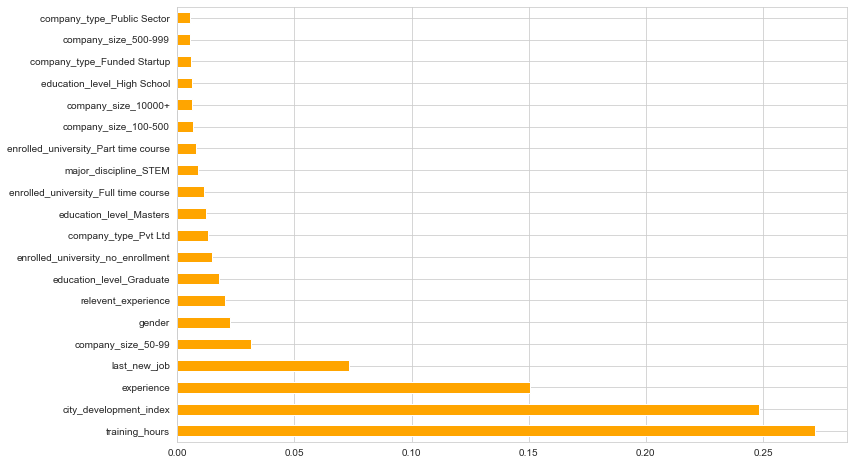

In [60]:

X = df2.drop(columns='target')
y = df2['target']
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh",color="orange")
plt.savefig("featureimportances.png")
plt.show()


In [61]:
df2.to_csv("cleaned_jobPrediction.csv")

<a id='model'></a>
# Modeling

>  In this section of the report, I will.

<li><a href="#logistic">logistic Regression</a></li>
<li><a href="#knn">KNN</a></li>
<li><a href="#tree">Decision Tree</a></li>
<li><a href="#rf">Random Forst</a></li>
<li><a href="#xgboost">xgboost</a></li>
<li><a href="#SVC Model">SVC Model</a></li>
<li><a href="#GradientBoostingClassifier">GradientBoostingClassifier</a></li>
<li><a href="#AdaBoostClassifier">AdaBoostClassifier</a></li>
<li><a href="#ML Classifier">ML Classifier</a></li>

<a id='logistic'></a>
## logistic Regression after label encoding & dummies ( feature eng )

In [62]:
y = df2['target']
X = df2.drop(columns='target')

#Logistic Regression After converting categorical variables to dummies

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred  = lr_model.predict(X_test)
accuracy_train_set = lr_model.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_set = lr_model.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_set = lr_model.score(X_test, y_test)  #get accuracy on test set
print('Logistic Regression Model, Accuracy (Train Set) :', accuracy_train_set)
print('Logistic Regression Model, Accuracy (Val Set) : ', accuracy_valid_set)
print('Logistic Regression Model, Accuracy (test Set) :' , accuracy_test_set)

# Area under the curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC :',auc)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred,target_names = ['0','1']))

Logistic Regression Model, Accuracy (Train Set) : 0.7729504172803142
Logistic Regression Model, Accuracy (Val Set) :  0.7719240837696335
Logistic Regression Model, Accuracy (test Set) : 0.7725130890052356
AUC : 0.6080157841388438
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2878
           1       0.58      0.28      0.38       942

    accuracy                           0.77      3820
   macro avg       0.69      0.61      0.62      3820
weighted avg       0.74      0.77      0.74      3820



## Solving the imbalanced data issue 

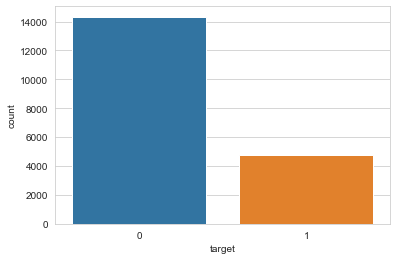

In [63]:
sns.countplot(x =df2["target"])
plt.savefig("imbalnced_target.png")
plt.show()

In [64]:
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 

x = np.concatenate([df2.drop('target', axis=1).values], axis=1)
y = df2['target'].values


In [65]:
from imblearn.over_sampling import SMOTE
x, y = SMOTE(random_state = 100).fit_resample(x, y)

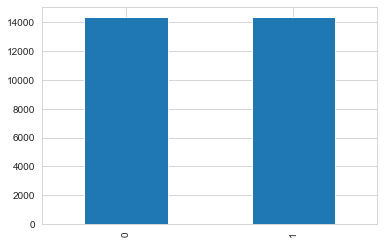

In [66]:
pd.value_counts(y).plot.bar();

### ADA

In [67]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(x, y)
pd.value_counts(y_train_ada)

0    14337
1    14337
dtype: int64

### Random over sampling

In [68]:
over_sample = RandomOverSampler(sampling_strategy='all')
X_train_over, y_train_over = over_sample.fit_resample(x, y)
y_train_over=pd.Series(y_train_over)
y_train_over.value_counts()

0    14337
1    14337
dtype: int64

## logistic Regression after Solving imbalanced data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

/Users/raghadalthunayan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
Logistic Regression Model, Accuracy (Train Set) : 0.709443627050297
Logistic Regression Model, Accuracy (Val Set) :  0.708151700087184
Logistic Regression Model, Accuracy (test Set) : 0.7157802964254577


precision : 0.713140467061694
recall    : 0.7171398527865405
f1        : 0.7151345683327508
AUC score : 0.7157871366639156


              precision    recall  f1-score   support

           0       0.72      0.71      0.72      2882
           1       0.71      0.72      0.72      2853

    accuracy                           0.72      5735
   macro avg       0.72      0.72      0.72      5735
weighted avg       0.72      0.72      0.72      5735



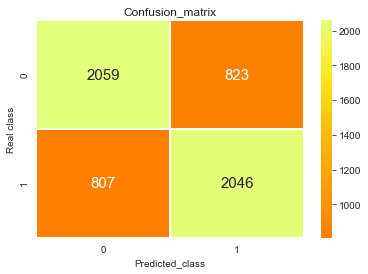

_________________________________________________________________________________


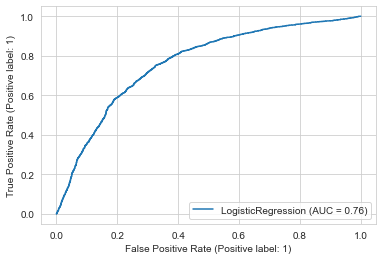

In [70]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_score,\
                            recall_score, accuracy_score,roc_auc_score, f1_score, plot_roc_curve
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred  = lr_model.predict(X_test)
accuracy_train_set = lr_model.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_set = lr_model.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_set = lr_model.score(X_test, y_test)  #get accuracy on test set
print('Logistic Regression Model')
print('Logistic Regression Model, Accuracy (Train Set) :', accuracy_train_set)
print('Logistic Regression Model, Accuracy (Val Set) : ', accuracy_valid_set)
print('Logistic Regression Model, Accuracy (test Set) :' , accuracy_test_set)
print('\n')
print("precision :",precision_score(y_test, y_pred))
print("recall    :",recall_score(y_test,y_pred))
print("f1        :",f1_score(y_test,y_pred))
print("AUC score :",metrics.roc_auc_score(y_test, y_pred, average=None))
print('\n')
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(lr_model, X_val, y_val)

<a id='knn'></a>
## KNN model

In [71]:
# 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)

[0.67759372 0.69014821 0.72414996 0.73164778 0.72671782]


In [72]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7100514984419706


In [73]:
# search for an optimal value of K for KNN
#k_range = list(range(1, 31))
#k_scores = []
#for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    #k_scores.append(scores.mean())
#print(k_scores)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)
knn = KNeighborsClassifier(n_neighbors=k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [75]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


## Tuning the parameters to find the best KNN model

In [76]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


In [77]:
# fit the grid with data
grid.fit(X_train, y_train);


In [78]:
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.00468388, 0.00308495, 0.00262122, 0.00261121, 0.00266614,
        0.00259571, 0.00273404, 0.00260553, 0.00256248, 0.00302424,
        0.00280166, 0.00265484, 0.00265722, 0.00274982, 0.00294313,
        0.00301223, 0.0028635 , 0.00272903, 0.00261655, 0.00279365,
        0.003585  , 0.0036644 , 0.00338202, 0.00413756, 0.00480618,
        0.00274582, 0.00272593, 0.00257754, 0.00270786, 0.00258694,
        0.00262017, 0.00267348, 0.00284734, 0.00286598, 0.00265288,
        0.00264244, 0.01263819, 0.00302267, 0.00277872, 0.00335302,
        0.00294175, 0.00263882, 0.00285521, 0.00303478, 0.00285258,
        0.0029952 , 0.00273604, 0.003473  , 0.00280657, 0.0025918 ,
        0.00367961, 0.00317278, 0.00294175, 0.00294189, 0.0030664 ,
        0.00315819, 0.00329318, 0.00349283, 0.00270734, 0.00274029,
        0.00264072, 0.0028934 , 0.00280538, 0.00293016, 0.00276756,
        0.00295424, 0.00303073, 0.00319533, 0.00253434, 0.00254116,
        0.0026351 , 0.00308056,

In [79]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


Best params:  {'n_neighbors': 1}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.7403408406859271


In [80]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print(knn.score(X_val, y_val))

pre=knn.predict(X_test)
pre2=knn.predict(X_train)

0.9980927469892649
0.7670444638186573
0.7567567567567568


Training Scores


precision : 0.9980387884070604
recall    : 0.9981475427699684
f1        : 0.9980931626259875
AUC score : 0.9980927380298502


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9174
           1       1.00      1.00      1.00      9177

    accuracy                           1.00     18351
   macro avg       1.00      1.00      1.00     18351
weighted avg       1.00      1.00      1.00     18351

Testing Scores


precision : 0.7031877846236271
recall    : 0.9200841219768665
f1        : 0.7971454600668083
AUC score : 0.7678144412798975


              precision    recall  f1-score   support

           0       0.89      0.62      0.73      2882
           1       0.70      0.92      0.80      2853

    accuracy                           0.77      5735
   macro avg       0.79      0.77      0.76      5735
weighted avg       0.80      0.77      0.76      5735



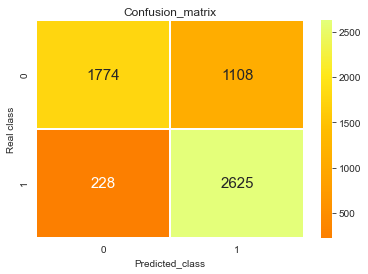

_________________________________________________________________________________


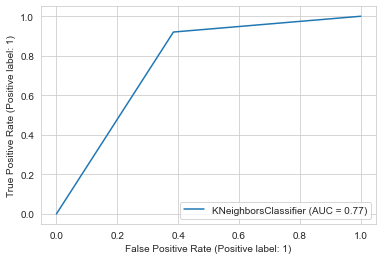

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_score,\
                            recall_score, accuracy_score,roc_auc_score, f1_score, plot_roc_curve


print('Training Scores')
print('\n')
print("precision :",precision_score(y_train,pre2))
print("recall    :",recall_score(y_train,pre2))
print("f1        :",f1_score(y_train,pre2))
print("AUC score :",metrics.roc_auc_score(y_train, pre2, average=None))
print('\n')
print(classification_report(y_train,pre2))




print('Testing Scores')
print('\n')
print("precision :",precision_score(y_test,pre))
print("recall    :",recall_score(y_test,pre))
print("f1        :",f1_score(y_test,pre))
print("AUC score :",metrics.roc_auc_score(y_test, pre, average=None))
print('\n')
print(classification_report(y_test,pre))

cnf_matrix = confusion_matrix(y_test, pre)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(knn , X_test, y_test)



<a id='tree'></a>
## Decision Tree

In [82]:
# Dividing the data into train and test
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 ,random_state = 2, stratify =y)


## Tuning the parameters to find the best decision tree model

In [83]:
model = DecisionTreeClassifier(criterion='gini',random_state = 100,class_weight='balanced')

parameter_dist = {'max_depth': [2, 3, 4,5,6,7,8,9], 'min_samples_leaf' : [2,3,4,5,6,7,8]}

from sklearn.model_selection import GridSearchCV
cv_dt = GridSearchCV(model, cv = 3,param_grid=parameter_dist, n_jobs = -1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search:- \n', cv_dt.best_params_)

Best Parameters using grid search:- 
 {'max_depth': 9, 'min_samples_leaf': 2}


In [84]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=9,class_weight='balanced', min_samples_leaf=5)

DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5,
                       random_state=100)

0.80871839581517
0.8018744551002616
0.8195193722412948
Accuracy Score:(training)  0.8195193722412948
Accuracy Score:(testing)  0.80871839581517


precision : 0.8239852398523986
recall    : 0.7826848930949877
f1        : 0.8028042423152975
AUC score : 0.8085874153191801


Classification Report (Training)
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      9174
           1       0.83      0.80      0.82      9177

    accuracy                           0.82     18351
   macro avg       0.82      0.82      0.82     18351
weighted avg       0.82      0.82      0.82     18351

________________________________
Classification Report (Testing)
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2882
           1       0.82      0.78      0.80      2853

    accuracy                           0.81      5735
   macro avg       0.81      0.81      0.81      5735
weighted avg       0.81      0.

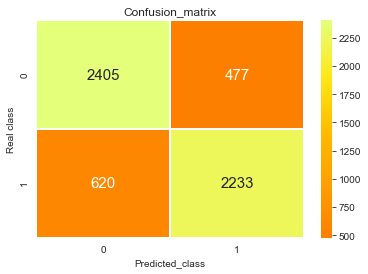

_________________________________________________________________________________


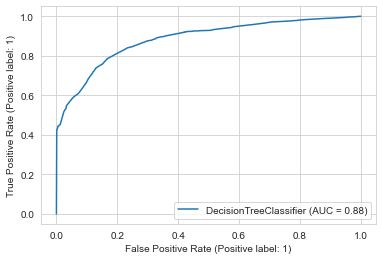

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

DTPred = DT.predict(X_test)
DTPred2 = DT.predict(X_train)
print(DT.score(X_test,y_test))
print(DT.score(X_val,y_val))
print(DT.score(X_train,y_train))
print('Accuracy Score:(training) ',accuracy_score(y_train, DTPred2))
print('Accuracy Score:(testing) ',accuracy_score(y_test, DTPred))
print('\n')
print("precision :",precision_score(y_test,DTPred))
print("recall    :",recall_score(y_test,DTPred))
print("f1        :",f1_score(y_test,DTPred))
print("AUC score :",metrics.roc_auc_score(y_test, DTPred, average=None))
print('\n')
print('Classification Report (Training)')
print(classification_report(y_train, DTPred2))
print('________________________________')

print('Classification Report (Testing)')
print(classification_report(y_test, DTPred))

cnf_matrix = confusion_matrix(y_test, DTPred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("DecisionTree.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(DT, X_test, y_test)
plt.savefig("DecisionTree1.png")


<a id='rf'></a>
## Random Forst

In [86]:
from sklearn.ensemble import RandomForestClassifier

Training Results:

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      9174
           1       0.90      0.88      0.89      9177

    accuracy                           0.89     18351
   macro avg       0.89      0.89      0.89     18351
weighted avg       0.89      0.89      0.89     18351



Testing Results:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2882
           1       0.84      0.82      0.83      2853

    accuracy                           0.84      5735
   macro avg       0.84      0.84      0.84      5735
weighted avg       0.84      0.84      0.84      5735



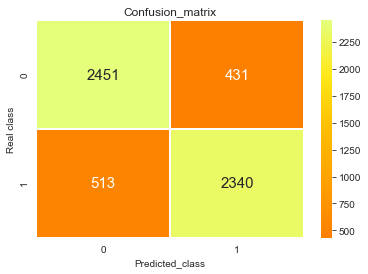

_________________________________________________________________________________


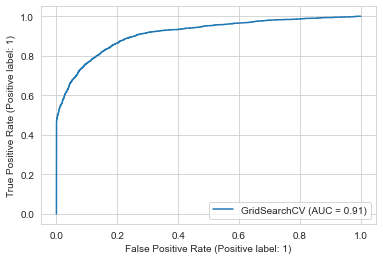

In [87]:
forest = RandomForestClassifier()
param_grid = {'n_estimators':[300,500,1000], 'class_weight' :['balanced'],'max_depth':[5,10,15] }
forest_cv =  GridSearchCV(forest, param_grid, cv=5)
forest_cv.fit(X_train, y_train)
ypred_tr = forest_cv.predict(X_train)
ypred_ts = forest_cv.predict(X_test)
print("Training Results:\n")
print(classification_report(y_train, ypred_tr))
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts))
cnf_matrix = confusion_matrix(y_test, ypred_ts)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("RandomForest.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(forest_cv, X_test, y_test)

<a id='xgboost'></a>
## xgboost Model

In [ ]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.1], 
              'max_depth': [5],
              'min_child_weight': [7],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [500], 
              'seed': [1337]}

XGB = xgb.XGBClassifier()
XGB = GridSearchCV(XGB, parameters, cv = StratifiedKFold(5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=1, refit=True)
# XGB = CalibratedClassifierCV(XGB, method="sigmoid")
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
#result.append(acc_xgb)

#Training

y_pred_xgb2 = XGB.predict(X_train)
cm_xgb2 = confusion_matrix(y_pred_xgb2,y_train)
fscore2 = f1_score(y_train,y_pred_xgb2)
acc_xgb2 = accuracy_score(y_train, y_pred_xgb2)



print(XGB.score(X_train , y_train))
print(XGB.score(X_val , y_val))
print (forest_cv.score(X_test , y_test))



In [ ]:
print("RESULTS (Training): ")
print("XGBoost Model Accuracy : ",round(acc_xgb2,2))
print("XGBoost Model F1-score : ",round(fscore2,2))
print("Classification Report :\n",classification_report(y_train,y_pred_xgb2))

print('-------------------------------')
print("RESULTS (Testing): ")
print("XGBoost Model Accuracy : ",round(acc_xgb,2))
print("XGBoost Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))




In [ ]:


print('\n')
print("precision :",precision_score(y_test,y_pred_xgb))
print("recall    :",recall_score(y_test,y_pred_xgb))
print("f1        :",f1_score(y_test,y_pred_xgb))
print("AUC score :",metrics.roc_auc_score(y_test, y_pred_xgb, average=None))
print('\n')
print(classification_report(y_test,y_pred_xgb))

cnf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("xgb.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(XGB, X_test, y_test)
plt.savefig("xgb.png")


<a id='SVC Model'></a>
## SVC Model

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))
pipeline.fit(X_train, y_train)

svc_prediction = pipeline.predict(X_test)
svc_prediction2 = pipeline.predict(X_train
                                  )
cm_svc = confusion_matrix(y_test, svc_prediction)
svc_df = pd.DataFrame(data=[accuracy_score(y_test, svc_prediction), recall_score(y_test, svc_prediction),
                   precision_score(y_test, svc_prediction), roc_auc_score(y_test, svc_prediction)], 
             columns=['SVC Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])



print(pipeline.score(X_train , y_train))
print(pipeline.score(X_val , y_val))
print (pipeline.score(X_test , y_test))
print("Training Report")
print(classification_report(y_train,svc_prediction2))
print("\n")
print("\n")
print("Testing Report")
print(classification_report(y_test,svc_prediction))



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
0.5780611410822298
0.5769398430688754
0.5792502179598954
Training Report
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      9174
           1       0.58      0.57      0.58      9177

    accuracy                           0.58     18351
   macro avg       0.58      0.58      0.58     18351
weighted avg       0.58      0.58      0.58     18351





Testing Report
              precision    recall  f1-score   support

           0       0.58      0.59      0.58      2882
           1       0.58      0.57      0.57      2853

    accuracy                           0.58      5735
   macro avg       0.58      0.58      0.58      5735
weighted avg       0.58      0.58      0.58      5735



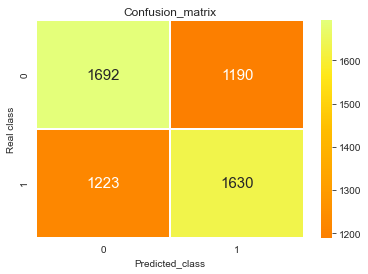

_________________________________________________________________________________


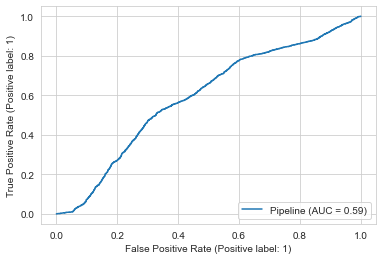

In [90]:
cnf_matrix = confusion_matrix(y_test, svc_prediction)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("SVC.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(pipeline, X_test, y_test)
plt.savefig("SVC.png")

<a id='GradientBoostingClassifier'></a>
## GradientBoostingClassifier

0.8402811835867255
0.8304272013949433
0.834001743679163
Training Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      9174
           1       0.85      0.83      0.84      9177

    accuracy                           0.84     18351
   macro avg       0.84      0.84      0.84     18351
weighted avg       0.84      0.84      0.84     18351





Testing Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2882
           1       0.84      0.82      0.83      2853

    accuracy                           0.83      5735
   macro avg       0.83      0.83      0.83      5735
weighted avg       0.83      0.83      0.83      5735



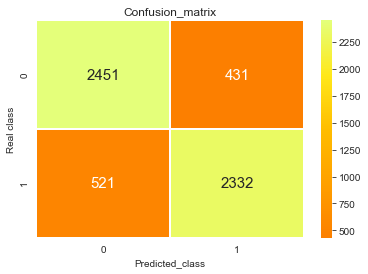

_________________________________________________________________________________


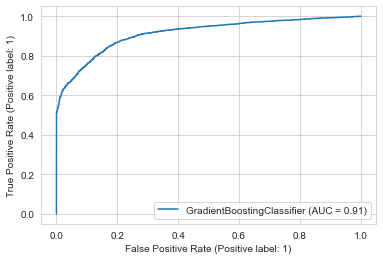

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=123)
gb.fit(X_train,y_train)
gbpre = gb.predict(X_test)
gbpre2 = gb.predict(X_train)

print(gb.score(X_train , y_train))
print(gb.score(X_val , y_val))
print (gb.score(X_test , y_test))

print("Training Report")
print(classification_report(y_train,gbpre2))
print("\n")
print("\n")
print("Testing Report")
print(classification_report(y_test,gbpre))

cnf_matrix = confusion_matrix(y_test, gbpre)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("pipeline.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(gb, X_test, y_test)
plt.savefig("pipeline.png")


<a id='AdaBoostClassifier'></a>
## AdaBoostClassifier

0.8134161626069424
0.800566695727986
0.8136006974716652
Training Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      9174
           1       0.82      0.80      0.81      9177

    accuracy                           0.81     18351
   macro avg       0.81      0.81      0.81     18351
weighted avg       0.81      0.81      0.81     18351





Testing Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2882
           1       0.82      0.79      0.81      2853

    accuracy                           0.81      5735
   macro avg       0.81      0.81      0.81      5735
weighted avg       0.81      0.81      0.81      5735



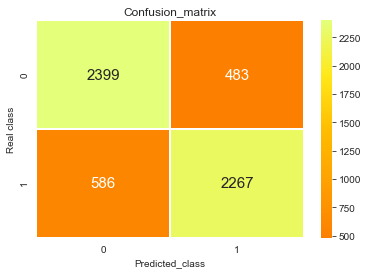

_________________________________________________________________________________


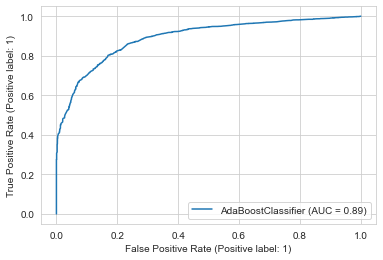

In [92]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(random_state=123)
ada.fit(X_train,y_train)
adpre = ada.predict(X_test)
adpre2 = ada.predict(X_train)
adcm = confusion_matrix(y_test,adpre)

print(ada.score(X_train , y_train))
print(ada.score(X_val , y_val))
print (ada.score(X_test , y_test))

print("Training Report")
print(classification_report(y_train,adpre2))
print("\n")
print("\n")
print("Testing Report")
print(classification_report(y_test,adpre))

cnf_matrix = confusion_matrix(y_test, adpre)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("Ada.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(ada, X_test, y_test)
plt.savefig("AdaBoost.png")


<a id='ML Classifier'></a>
## ML Classifier

0.8357037763609613
0.7881429816913688
0.7879686137750654
Training Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      9174
           1       0.81      0.87      0.84      9177

    accuracy                           0.84     18351
   macro avg       0.84      0.84      0.84     18351
weighted avg       0.84      0.84      0.84     18351





Testing Report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2882
           1       0.77      0.83      0.79      2853

    accuracy                           0.79      5735
   macro avg       0.79      0.79      0.79      5735
weighted avg       0.79      0.79      0.79      5735



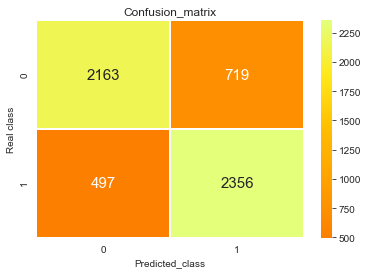

_________________________________________________________________________________


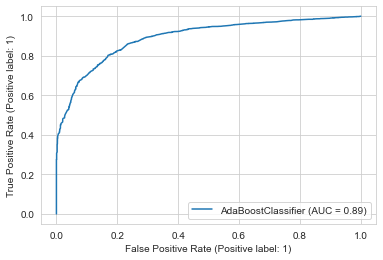

In [93]:
from sklearn.neural_network import MLPClassifier

ml = MLPClassifier(hidden_layer_sizes=(100,50,20),random_state=123)
ml.fit(X_train,y_train)
mlpre = ml.predict(X_test)
mlpre2 = ml.predict(X_train)

print(ml.score(X_train , y_train))
print(ml.score(X_val , y_val))
print (ml.score(X_test , y_test))

print("Training Report")
print(classification_report(y_train,mlpre2))
print("\n")
print("\n")
print("Testing Report")
print(classification_report(y_test,mlpre))


cnf_matrix = confusion_matrix(y_test, mlpre)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("ML.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(ada, X_test, y_test)
plt.savefig("ML.png")


In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
models_list = [lr_model,
               knn,
               DT,
               forest_cv,
               XGB,
               pipeline,
               gb,
               ada,
               ml,
              ]

models = []
accuracies_tr = []
accuracies_va = []
accuracies_te = []
precisions = []
recalls = []
roc_scores = []
f1_scores = []
for model in models_list:
    if(model == models_list[-1]):
        count_vectorizer = CountVectorizer(ngram_range=(1, 2),  max_df = 0.6)
        X = df2.drop(columns='target')
        y = df2['target']
        #X, y = weather.drop('PRECIP_TYPE',axis=1), weather['PRECIP_TYPE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=1)
    sm = SMOTE(random_state=123)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    pd.value_counts(y_train_smote)
    accuracy1 = model.score(X_train_smote, y_train_smote)  #get accuracy
    accuracy2 = model.score(X_val, y_val)  #get accuracy
    accuracy3 = model.score(X_test, y_test)  #get accuracy
    y_pred = model.predict(X_val) #get predictions
    model_name = type(model).__name__
    print("Accuracy for train("+ model_name + "): ", accuracy1.round(4)) #display accuracy
    print("Accuracy for validation("+ model_name + "): ", accuracy2.round(4)) #display accuracy
    print("Accuracy for Test("+ model_name + "): ", accuracy3.round(4)) #display accuracy
    print("F1 score("+ model_name + "): ", f1_score(y_val,y_pred).round(4)) #display F1
    print("Precision("+ model_name + "): ", precision_score(y_val,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(y_val,y_pred).round(4)) #display recall
    print("ROC Score("+ model_name + "): ",roc_auc_score(y_val,y_pred).round(4)) #display recall
    print("\n")
    print('_________________________________________________________________________________')
    print("\n")
    models.append(model_name)
    accuracies_tr.append(accuracy1.round(4))
    accuracies_va.append(accuracy2.round(4))
    accuracies_te.append(accuracy3.round(4))
    f1_scores.append(f1_score(y_val,y_pred).round(4))
    precisions.append(precision_score(y_val,y_pred).round(4))
    recalls.append(recall_score(y_val,y_pred).round(4))
    roc_scores.append(roc_auc_score(y_val,y_pred).round(4))


In [ ]:
results = pd.DataFrame({"Model" : models, "Accuracy for train" : accuracies_tr,
                        "Accuracy for validation" : accuracies_va,"Accuracy for test" : accuracies_te,"F1" : f1_scores, "Precision" : precisions, "Recall" : recalls, 'ROC Score' :roc_scores})
results

In [ ]:
results.plot(kind = 'bar',figsize=(20,10))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.ylim(0.30, 1.0)
plt.xlabel("ROC score")
plt.show();

In [ ]:
plt.figure(figsize = (10,10))
x = results
x=x.sort_values(by=['F1'])

x["F1"].plot(kind = 'barh')
plt.title("Compare f1 Score of the Models")
plt.ylabel("Models")
plt.xlim(0.50, 1.0)
plt.xlabel("F1 Score")
plt.savefig("abc.png",transparent=True)

plt.savefig("abc.png") 

## ROC Curve

AttributeError: predict_proba is not available when  probability=False

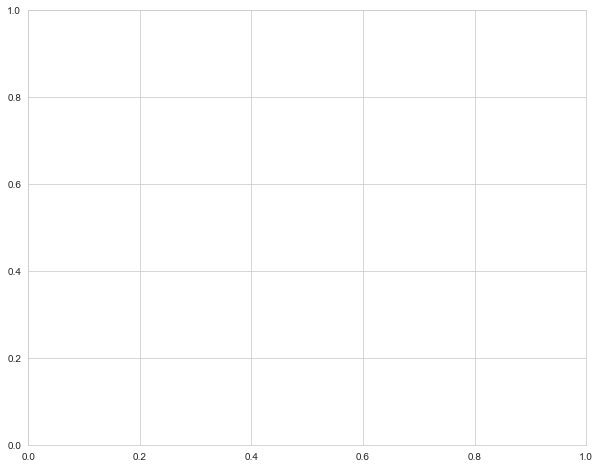

In [97]:
ig, ax = plt.subplots(figsize=(10,8))
# KNN
knn_probs = knn.predict_proba(X_val)[:, 1]
# LR
lr_probs = lr_model.predict_proba(X_val)[:, 1]
# svm
#svm_probs = svm.predict_proba(X_test)[:, 1]
# tree
dtree_probs = DT.predict_proba(X_val)[:, 1]
# RF
rf_probs = forest_cv.predict_proba(X_val)[:, 1]
# Adaboosting
#xg_probs = XGB.predict_proba(X_val)[:, 1]
# GB
Gb_probs = pipeline.predict_proba(X_val)[:, 1]
#
gb_probs = gb.predict_proba(X_val)[:, 1]

ada_probs = ada.predict_proba(X_val)[:, 1]
ml_probs = ml.predict_proba(X_val)[:, 1]
#svm_probs = svm.predict_proba(X_test,probability=True)[:, 1]

# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_val, knn_probs)
fpr2, tpr2, _ = roc_curve(y_val, lr_probs )
fpr3, tpr3, _ = roc_curve(y_val, dtree_probs)
fpr4, tpr4, _ = roc_curve(y_val, rf_probs )
#fpr5, tpr5, _ = roc_curve(y_val, xg_probs)
fpr6, tpr6, _ = roc_curve(y_val, Gb_probs)
fpr7, tpr7, _ = roc_curve(y_val, gb_probs)
fpr8, tpr8, _ = roc_curve(y_val, ada_probs)
fpr9, tpr9, _ = roc_curve(y_val, ml_probs)
#fpr7, tpr7, _ = roc_curve(y_test, svm_probs)
auc1 = round(100*(roc_auc_score(y_val, knn_probs)), 3)
auc2 = round(100*(roc_auc_score(y_val,lr_probs)), 3)
auc3 = round(100*(roc_auc_score(y_val,dtree_probs)), 3)
auc4 = round(100*(roc_auc_score(y_val, rf_probs)), 3)
#auc5 = round(100*(roc_auc_score(y_val, xg_probs)), 3)
auc6 = round(100*(roc_auc_score(y_val, Gb_probs)), 3)

auc7 = round(100*(roc_auc_score(y_val, gb_probs)), 3)
auc8 = round(100*(roc_auc_score(y_val, ada_probs)), 3)
auc9 = round(100*(roc_auc_score(y_val, ml_probs)), 3)
#auc7 = round(100*(roc_auc_score(y_test, svm_probs)), 3)

# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'KNN, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Logistic Regression, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Decision Tree, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'Random Forest, AUC: {auc4}')
#plt.plot(fpr5, tpr5, linestyle='-', label=f'XGBoost , AUC: {auc5}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'SVC, AUC: {auc6}')
plt.plot(fpr7, tpr7, linestyle='-', label=f'GradientBoostingClassifier, AUC: {auc7}')
plt.plot(fpr8, tpr8, linestyle='-', label=f'AdaBoostClassifier, AUC: {auc8}')
plt.plot(fpr9, tpr9, linestyle='-', label=f'ML Classifier, AUC: {auc9}')

#plt.plot(fpr7, tpr7, linestyle='-', label=f'SVM, AUC: {auc7}')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig("ROC_Curve.png")
plt.show()

In [ ]:
#!pip install flask-ngrok

<a id='conclusions'></a>
## Conclusions

>#### After doing 9 ML algorithms we notate that ( XGBOOST        model) is the best model based on the f1 score it was better than another models.